# Decoding Diversity: A Comprehensive Study on Multilingual Language Identification in South Africa Using NLP Techniques

    Written By Lucpah Nekati

## Introduction

South Africa, known for its rich linguistic diversity, stands as a multicultural society with eleven official languages (isiXhosa, English, Sepedi, Tshivenda, Setswana, isiNdebele, isiZulu, siSwati, Xitsonga, Sesotho, and Afrikaans). This linguistic richness extends to the digital realm, where systems and devices strive to communicate effectively in multiple languages. Language identification, a crucial aspect of Natural Language Processing (NLP), plays a pivotal role in understanding and processing text in a multilingual environment. 

The dataset at the core of this study is sourced from the NCHLT Text Corpora, meticulously collected by the South African Department of Arts and Culture in collaboration with the Centre for Text Technology at North-West University. The training set, further refined by Praekelt, contains language-labeled text samples in various states of cleanliness.

## Problem statement

In the context of South Africa's multilingual society, effective language identification in textual data poses a significant challenge. The coexistence of eleven official languages introduces complexity to digital communication, requiring advanced Natural Language Processing (NLP) solutions. The lack of robust language identification models tailored to the linguistic diversity of South Africa hinders various applications, including machine translation, sentiment analysis, and information retrieval.

Current language identification systems often struggle to accurately discern between South Africa's official languages, given their shared linguistic roots and contextual similarities. The inadequacy of existing models highlights the need for a specialized approach that not only accommodates multiple languages but also considers the nuances specific to South Africa's sociolinguistic landscape.

This study addresses the pressing problem of reliable language identification in a multilingual setting, aiming to enhance the performance of existing models and contribute valuable insights to the broader field of Natural Language Processing.

## Objectives

The primary objective of this study is to develop a robust language identification model using NLP techniques. The specific goals include:

1. Data Exploration and Cleaning:

Conduct exploratory data analysis (EDA) to understand the distribution of languages in the training set.
Implement data cleaning techniques, including text normalization and handling varying levels of cleanliness.

2. Language Identification Model:

Develop and train a language identification model using the provided dataset.
Utilize Natural Language Processing techniques to enhance the model's performance.

3. Performance Evaluation:

Assess the performance of the language identification model through  k-cross validation and analyze the results.
Compare the effectiveness of different machine learning models for language identification.

4. Text Preprocessing and Feature Engineering:

Implement text preprocessing steps, including cleaning and removing stopwords.
Explore feature engineering to improve the model's ability to distinguish between languages.

5. Model Comparison and Visualization:

Compare the performance of multiple machine learning models through K-fold cross-validation.
Visualize and interpret the results using graphs to gain insights into the strengths and weaknesses of each model.

<a id="one"></a>
## 1. Importing packages and Libraries
<a href=#cont>Back to Table of Contents</a>
        
        Packages and libraries that we will use in the project

In [52]:
# Install contractions
!pip install contractions

In [53]:
# Installing ntlk
!pip install nltk

In [54]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np  # Numerical operations and array manipulation
import pandas as pd  # Data manipulation and analysis using dataframes
import matplotlib.pyplot as plt  # Plotting library for creating visualizations
import seaborn as sns  # Data visualization library based on matplotlib, for statistical graphics
import re  # Regular expressions for pattern matching and text manipulation
from wordcloud import WordCloud  # For generating word clouds

# Text processing libraries
import contractions  # For expanding contractions in text
from collections import Counter  # For counting occurrences of elements
import spacy  # For advanced natural language processing
import nltk  # Natural Language Toolkit for language processing
from nltk.corpus import stopwords  # Stopwords for filtering out common words
from nltk.corpus import wordnet  # Lexical database for English language
from nltk.stem import WordNetLemmatizer  # Lemmatization for word normalization
from nltk.tokenize import word_tokenize  # Tokenization for breaking text into words
from nltk.tokenize import TreebankWordTokenizer
from nltk import FreqDist  # Frequency distribution for word frequency analysis
nltk.download('WordNetLemmatizer')
nltk.download('punkt')  # Download punkt data for tokenization
nltk.download('stopwords')  # Download stopwords data
nltk.download('wordnet')  # Download wordnet data

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings during execution

# Libraries for data preparation and model building
from sklearn import model_selection  # For model selection operations
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier  # Decision Tree models
from sklearn.ensemble import RandomForestClassifier  # Random Forest models
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter tuning
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text data to a matrix of TF-IDF features
from sklearn import model_selection  # Model selection operations
from sklearn import preprocessing  # Data preprocessing operations
from sklearn import calibration  # Probability calibration
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text data to a matrix of TF-IDF features

# Model Evaluation and Hyperparameter Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model evaluation and hyperparameter tuning
import pickle  # Pickle module for saving and loading Python objects

# Notebook Environment
from IPython.core.display import HTML  # Display HTML content in the notebook

[nltk_data] Error loading WordNetLemmatizer: Package
[nltk_data]     'WordNetLemmatizer' not found in index
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>


    Statistical summary of the dataset for example Basic statistical insights to understand the distribution of languages (lang_id)

<a id="two"></a>
### 2.1. Reading data sets into pandas DataFrame
<a href=#cont>Back to Table of Contents</a>

In [55]:
# Load train data set
train_df = pd.read_csv(r'/kaggle/input/language-identification-hack/train_set.csv')

# Load test data set
test_df = pd.read_csv(r'/kaggle/input/language-identification-hack/test_set.csv')

# Load submission sample
submission_sample_df = pd.read_csv(r'/kaggle/input/language-identification-hack/sample_submission.csv')

In [56]:
# View train_df
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


* The train data set has two features, lang_id (target variable) and text-the independent variable. There are special characters like '-' that will need to be cleaned.

In [57]:
# View test_df
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


* The test data set has two features, index and text, and no target variable. There are punctuations and mixed cases in the data that will be cleaned. 

In [58]:
# View sample_submission_df
submission_sample_df.head(2)

,index,lang_id
0,1,tsn
1,2,nbl


* The sample submission file has the index and lang_id features. This is the format for Kaggle submission.

<a id="two"></a>
### 2.2. Inspecting data
<a href=#cont>Back to Table of Contents</a>

            The datasets will be inspected for data types and missing values.

In [59]:
# Checking data types of data sets
print(train_df.info()) # Infor for train_df
print(test_df.info()) # Info for test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB
None


* The train dataset has 33000 entries and two feature, whereas the test dataset has 5682 entries and two features. The lang_id and text features in the train dataset are non-numerical data types, while the test data test has a numeical data set (index) and a non-numerical text feature. There are no missing values in both datasets, but will be confirmed in the next section. 

In [60]:
# Check for missing values
print(train_df.isna().sum()) # Missing vlaues for train_df
print(test_df.isna().sum()) # Missing values for test_df

lang_id    0
text       0
dtype: int64
index    0
text     0
dtype: int64


* The datasets have no missing values.

In [61]:
# Check unique values for lang_id in train dataset
print(train_df['lang_id'].unique()) # Show unique values in lang_id
print(train_df['lang_id'].nunique()) # Number of unique values in lang_id

['xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr']
11


* There are 11 unique values in the lang_id features: 'xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr'.

    - xho - isiXhosa
    - eng - English
    - nso - Sepedi
    - ven - Tshivenda
    - tsn - Setswana
    - nbl - isiNdebele
    - zul - isiZulu
    - ssw - siSwati
    - tso - Xitsonga
    - sot - Sesotho
    - afr - Afrikaans

In [62]:
# Check for duplicates in the 'text_column'
train_df['text'].duplicated().sum()

3052

* There were 3052 duplictates in the train_df that were removed in EDA.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>


    Statistical summary of the dataset for example Basic statistical insights (number of texts)
    Visualization: Plotting frequency distributions, or histograms to understand
    the distribution of languages and most common languages.

<a id="three"></a>
### 3.1. Dropping duplicates
<a href=#cont>Back to Table of Contents</a>


In [63]:
# Drop duplicates
train_df = train_df.drop_duplicates(subset=['text'], inplace=False)

In [64]:
# Confirm if all duplicates were removed
train_df['text'].duplicated().sum()

0

* All duplicates were removed.

<a id="three"></a>
### 3.2. Language distribution among texts
<a href=#cont>Back to Table of Contents</a>

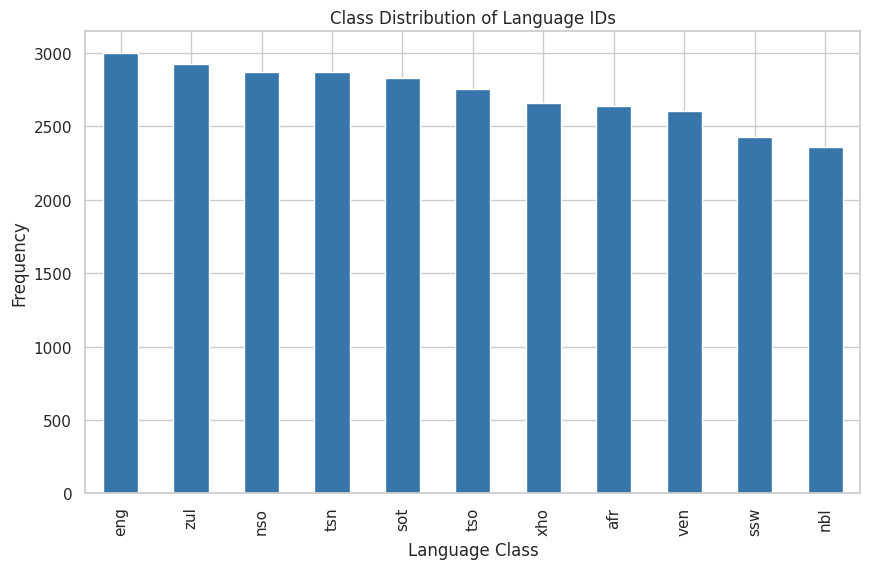

In [65]:
# Check the distribution of language IDs
language_distribution = train_df['lang_id'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
language_distribution.plot(kind='bar', color='#3776ab')
plt.title('Class Distribution of Language IDs')
plt.xlabel('Language Class')
plt.ylabel('Frequency')
plt.show()

* There is slight class imbalance among our language classes as shown in the bar graph above. There might need resampling but the class imbalance is not very high.

<a id="three"></a>
### 3.2. Text length distribution per langauge
<a href=#cont>Back to Table of Contents</a>

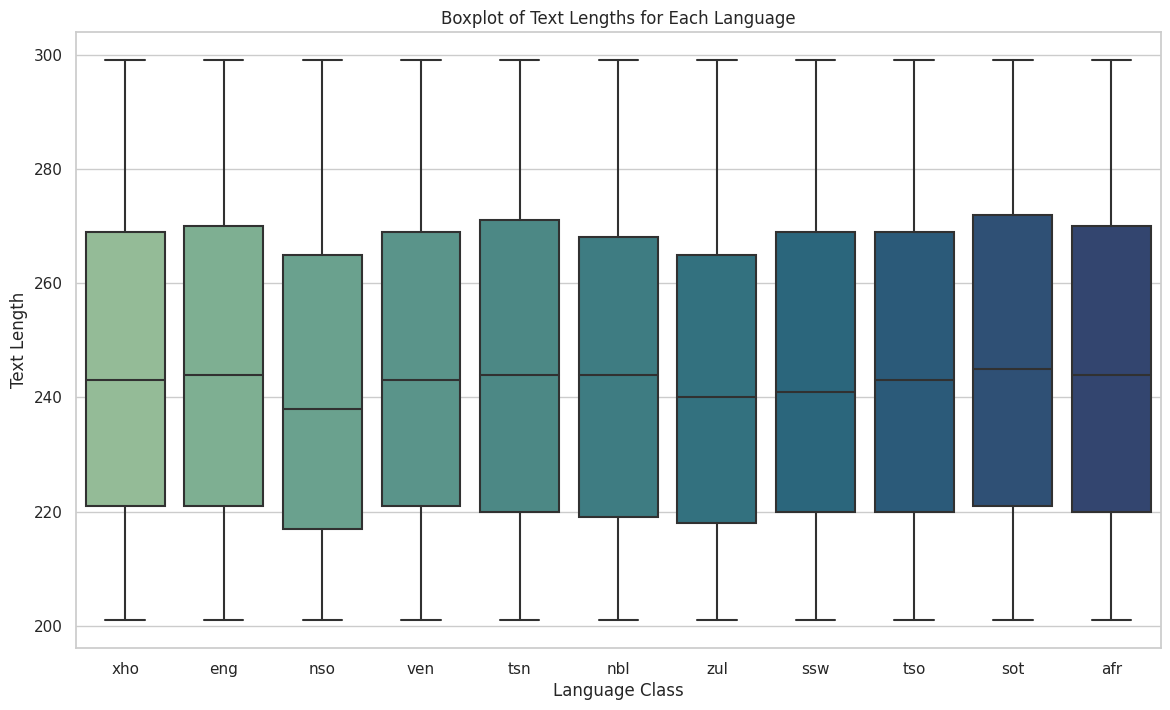

In [66]:
# Character distribution of texts for each language
# Calculate text lengths for each row
train_df['text_length'] = train_df['text'].apply(len)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='lang_id', y='text_length', data=train_df, palette='crest')

plt.title('Boxplot of Text Lengths for Each Language')
plt.xlabel('Language Class')
plt.ylabel('Text Length')
plt.show()

* The average text length for all languages is between 200 and 300 characters, with nso (Sepedi) have the shortest text length. On the other hand, eng (English), tsn (Setswana), and sot (Sesotho) seem to have larger average text lengths.

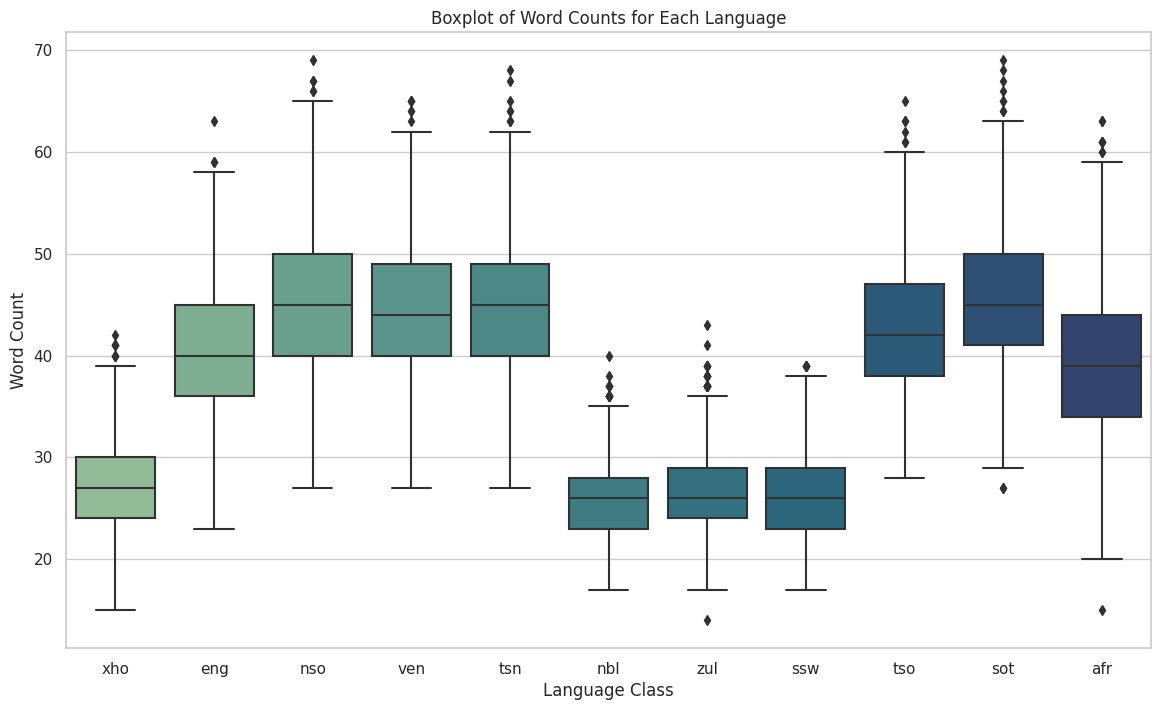

In [67]:
# Word distribution of text for each language
# Calculate word lengths for each row
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))

# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='lang_id', y='word_count', data=train_df, palette='crest')

plt.title('Boxplot of Word Counts for Each Language')
plt.xlabel('Language Class')
plt.ylabel('Word Count')
plt.show()

* The average word count distribution in a text is between 10 and 70 as hown in the histogram. The histogram also shows that nbl (IsiNdebele) has the shortest average words of all the 11 languages. IsiZulu (zul) and ssw (siSwati) are among the top three languages with the shortest average word count in a text. On the other hand, sot (Sesotho) has the longest average word count in a text, followed by nso (Sepedi). 

<a id="three"></a>
### 3.3. Data cleaning
<a href=#cont>Back to Table of Contents</a>

    Removing punctuations, special characters, and making all text lower case.

In [68]:
# Expand contractions in the message feature
def expand_contractions(text):
    """
    Expand contractions in a given text using the contractions library.

    Parameters:
        text (str): Input text containing contractions.

    Returns:
        str: Text with expanded contractions.
    """
    expanded_text = contractions.fix(text)
    return expanded_text

def expand_contractions_in_column(dataframe, text_column='message'):
    """
    Expand contractions in a specific column of a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame containing text data.
        text_column (str): Name of the column containing the text data.

    Returns:
        pd.DataFrame: DataFrame with expanded contractions.
    """
    # Apply the expand_contractions function to the specified column
    dataframe[text_column] = dataframe[text_column].apply(expand_contractions)
    
    return dataframe

In [69]:
# Remove contractions from text feature in train_df
expanded_train_dataframe = expand_contractions_in_column(train_df, text_column='text')

In [70]:
# Remove contractions from text feature in train_df
expanded_test_dataframe = expand_contractions_in_column(test_df, text_column='text')

* Contractions were removed from train and test text features.

In [71]:
# Removing special characters, stop words, and numbers
def clean_text(text):
    """
    Clean and preprocess text data.

    Parameters:
        text (str): Input text to be cleaned.

    Returns:
        str: Cleaned text.
    """
    # Convert to lowercase (consider whether you want this)
    text = text.lower()
    
    # Remove special characters, numbers, and extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [72]:
# Clean text in train_df
train_df['cleaned_text'] = train_df['text'].apply(clean_text)

In [73]:
# Show cleaned train dataset
train_df.head()

,lang_id,text,text_length,word_count,cleaned_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,220,24,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,252,31,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,264,37,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,217,40,o netefata gore o ba file dilo ka moka te le d...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,239,43,khomishini ya ndinganyiso ya mbeu yo ewa maana...


* The text in the train dataset have been cleaned and there are no special characters.

In [74]:
# Clean text in test_df
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

In [75]:
# Show cleaned testdataset
test_df.head()

,index,text,cleaned_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta


* Text has been cleaned in the test dataset and stored in the cleaned_text feature. All characters are lower case and there are no punctuations and special characters. 

In [76]:
# Remove stopwords from English text
def remove_english_stopwords(text):
    """
    Remove English stop words from text.

    Parameters:
        text (str): Input text.

    Returns:
        str: Text with English stop words removed.
    """
    # Download English stop words
    stop_words_set = set(stopwords.words('english'))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove English stop words
    tokens = [word for word in tokens if word.lower() not in stop_words_set]
    
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [77]:
# Remove stopwords from text in train_df
train_df['cleaned_text'] = train_df['text'].apply(remove_english_stopwords)

In [78]:
# Remove stopwords from text in train_df
test_df['cleaned_text'] = test_df['text'].apply(remove_english_stopwords)

* All English stopwords were removed from the text. There are no corpora for other languages, so stopwords were only removed for available English stopwords.

<a id="three"></a>
### 3.3. Language pair analysis
<a href=#cont>Back to Table of Contents</a>

    Exploring common phrases or words between certain language pairs. This could help identify potential challenges in language identification.

In [79]:
# Define a dictionary for language labels
language_labels = {
    'afr': 'Afrikaans',
    'eng': 'English',
    'nbl': 'isiNdebele',
    'nso': 'Sepedi',
    'sot': 'Sesotho',
    'ssw': 'siSwati',
    'tsn': 'Setswana',
    'tso': 'Xitsonga',
    'ven': 'Tshivenda',
    'xho': 'isiXhosa',
    'zul': 'isiZulu'
}

In [80]:
def language_pair_analysis(df, language_labels, top_n=10):
    """
    Perform language pair analysis on a given dataset.

    Parameters:
        dataset_path (str): Path to the dataset CSV file.
        language_labels (dict): Dictionary mapping language codes to names.
        top_n (int): Number of top language pairs to display and visualize. Default is 10.

    Returns:
        None
    """
    
    # Assuming you've already defined the clean_text function
    df['cleaned_text'] = df['text'].apply(clean_text)

    # Create languages features from lang_id
    df['language_name'] = df['lang_id'].map(language_labels)

    # Language Pair Analysis
    language_pairs_counter = Counter(zip(df['language_name'], df['language_name'].shift(-1)))

    # Display the most common language pairs
    most_common_pairs = language_pairs_counter.most_common(top_n)
    print(f"Top {top_n} Most Common Language Pairs:")
    for pair, count in most_common_pairs:
        print(f"{pair[0]} to {pair[1]}: {count} occurrences")

    # Visualization (Optional)
    pairs, counts = zip(*most_common_pairs)

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(pairs)), counts, tick_label=[f"{pair[0]} to {pair[1]}" for pair in pairs])
    plt.xlabel('Language Pairs')
    plt.ylabel('Occurrences')
    plt.title(f'Top Language Pairs in the Dataset (Top {top_n})')
    plt.xticks(rotation=45, ha='right')
    plt.show()


Top 10 Most Common Language Pairs:
English to Setswana: 303 occurrences
Setswana to Sepedi: 296 occurrences
English to English: 296 occurrences
Xitsonga to English: 295 occurrences
isiZulu to Sepedi: 294 occurrences
Sesotho to Xitsonga: 292 occurrences
Sepedi to English: 291 occurrences
Setswana to isiZulu: 288 occurrences
Sesotho to Sepedi: 288 occurrences
isiZulu to isiZulu: 288 occurrences


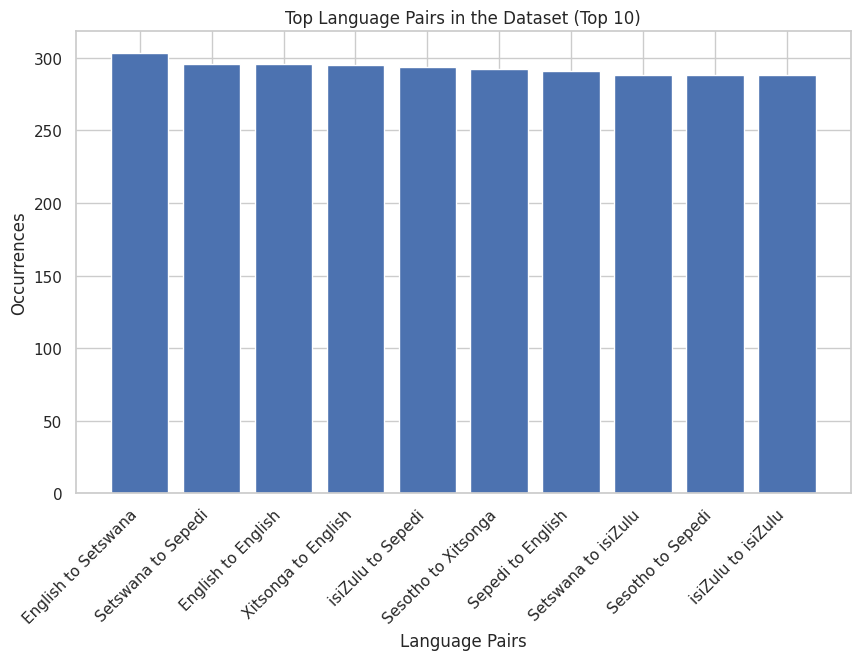

In [81]:
# Apply language pair analysis to train_df
language_pair_analysis(train_df, language_labels, top_n=10)

* Language pair analysis of data showed the most occurrences of language pairs between English and Setswana and Setswana and Sepedi. These language pairs represent various translation tasks in different South African languages and English. The pairs involving the same language for source and target (e.g., English to English or isiZulu to isiZulu) might be used for tasks like language understanding, sentiment analysis, or document classification within the same language. The other pairs involve translation between different languages, facilitating cross-language communication and understanding.

In [82]:
# Top 10 language pairs
most_common_pairs = ['English to Setswana',
                    'Setswana to Sepedi',
                    'English to English',
                    'Xitsonga to English',
                    'isiZulu to Sepedi',
                    'Sesotho to Xitsonga',
                    'Sepedi to English',
                    'Setswana to isiZulu',
                    'Sesotho to Sepedi',
                    'isiZulu to isiZulu']

In [83]:
def generate_word_cloud(text, language_name):
    """
    Generate a word cloud for a given text.

    Parameters:
        text (str): Input text.
        language_name (str): Name of the language for labeling the word cloud.

    Returns:
        None
    """
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {language_name} Text')
    plt.show()

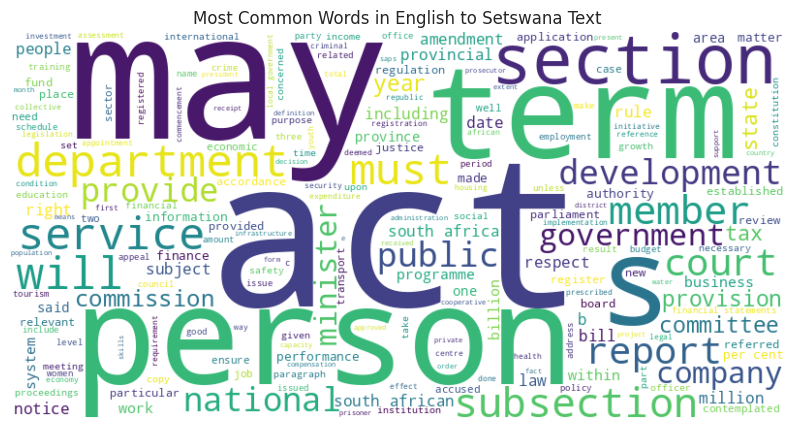

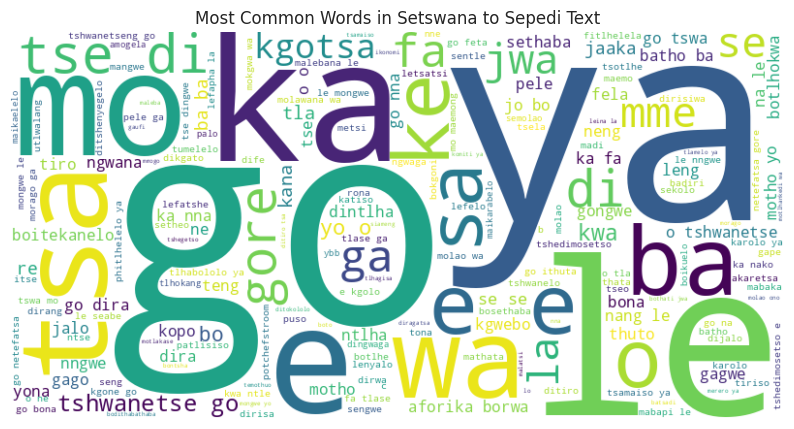

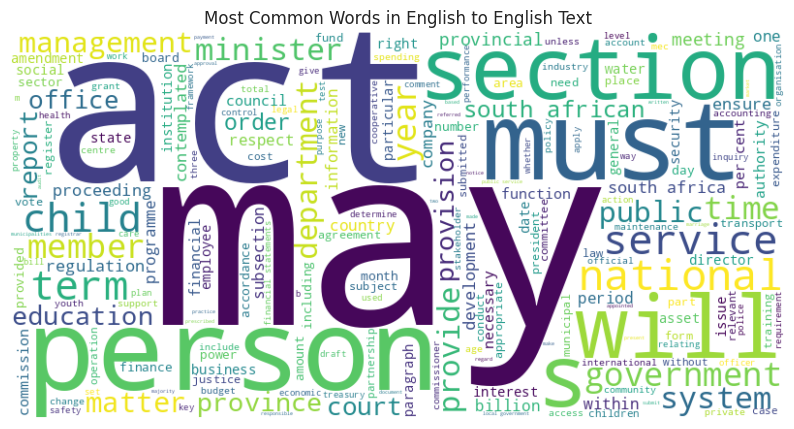

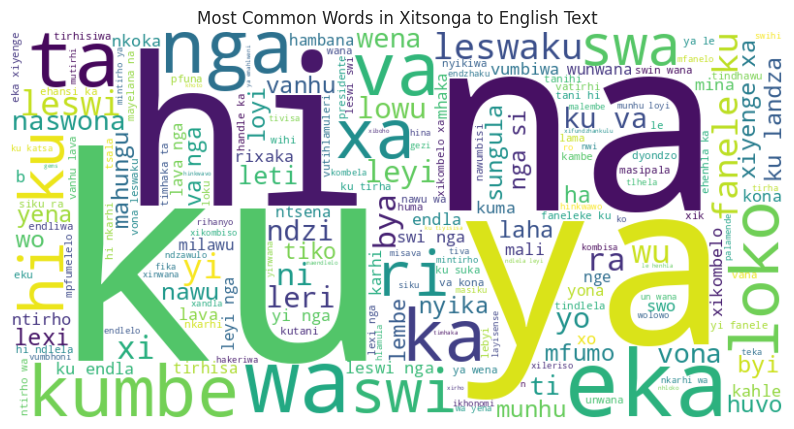

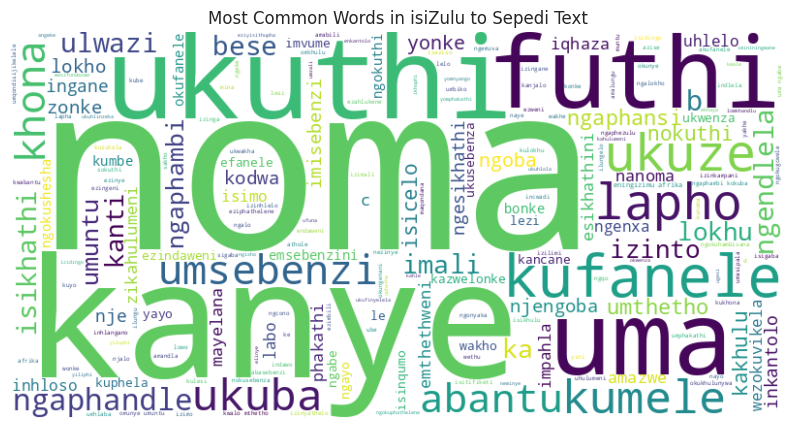

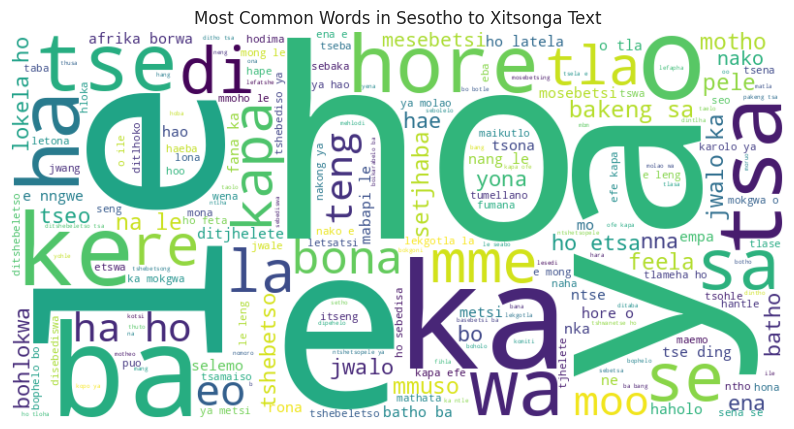

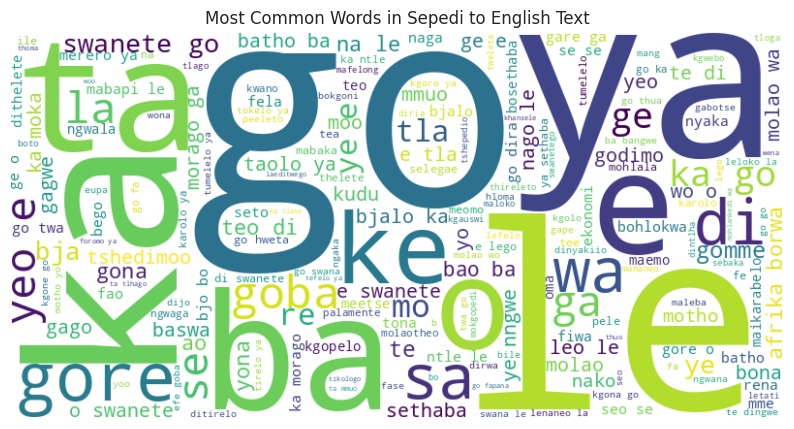

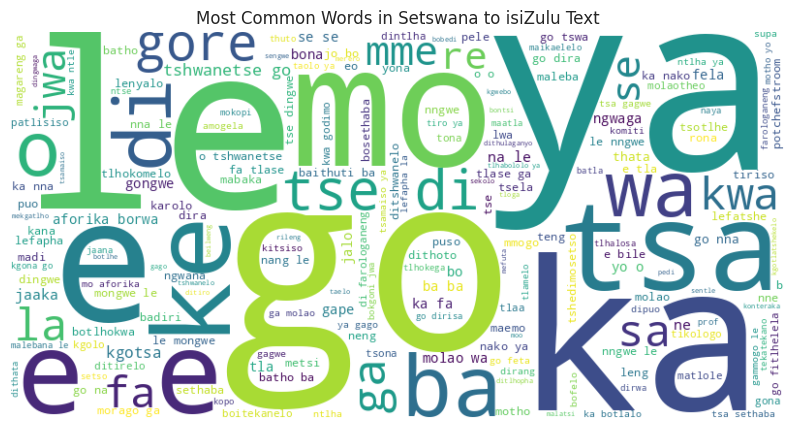

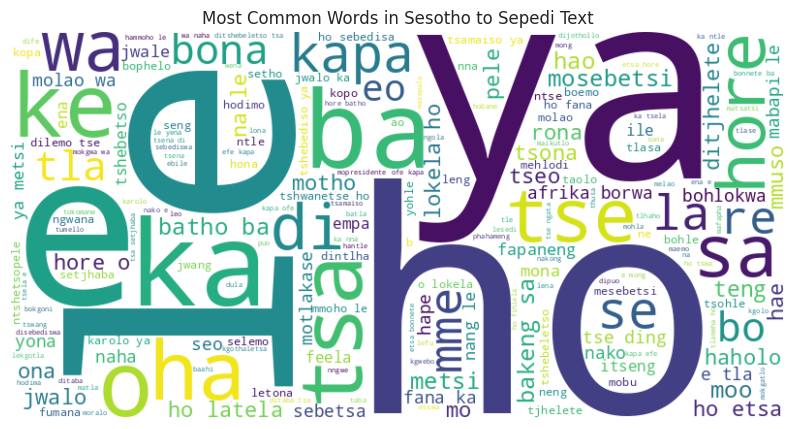

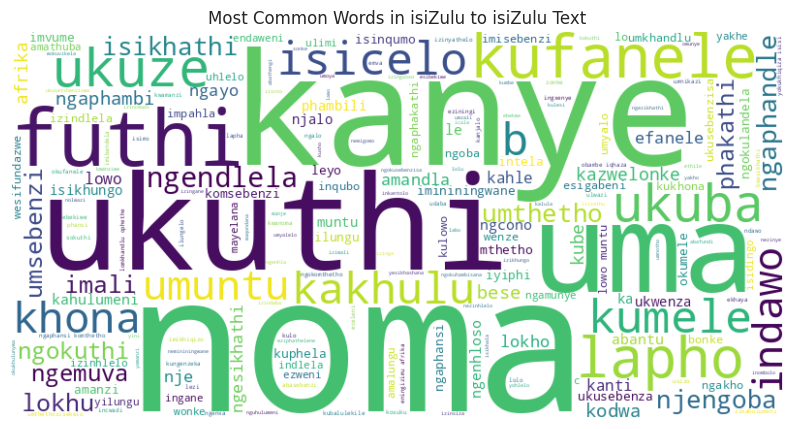

In [84]:
# Generate word clouds for the top 10 language pairs
for pair_str in most_common_pairs:
    lang1, lang2 = pair_str.split(' to ')
    pair_df = train_df[(train_df['language_name'] == lang1) & (train_df['language_name'].shift(-1) == lang2)]
    combined_text = ' '.join(pair_df['cleaned_text'])
    generate_word_cloud(combined_text, f'{lang1} to {lang2}')

<a id="four"></a>
## 4. Feature engineering
<a href=#cont>Back to Table of Contents</a>

    Extracting relevant features e.g Converting text data into a format suitable for machine learning models


<a id="four"></a>
### 4.1. Vectorization
<a href=#cont>Back to Table of Contents</a>

In [85]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100000, max_df=1.0, ngram_range=(1, 2), 
                                   stop_words='english', analyzer='word')

# Fit and transform the cleaned_text data
X_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_text']) 

# Vectorize cleaned_text in test_df
test_lang = tfidf_vectorizer.transform(test_df['cleaned_text']) 

<a id="four"></a>
### 4.2. Splitting data
<a href=#cont>Back to Table of Contents</a>

In [86]:
# Define features and variables
X = X_tfidf
y = train_df['lang_id']

In [87]:
# Apply 80-20 split to data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Show train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23958, 100000)
(5990, 100000)
(23958,)
(5990,)


<a id="five"></a>
## 5. Modelling
<a href=#cont>Back to Table of Contents</a>

<a id="five"></a>
### 5.1. Naive Bayes
<a href=#cont>Back to Table of Contents</a>

In [89]:
# Initialise Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
nb_predictions = nb_classifier.predict(X_test)

# Evaluate the performance
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4%}")
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 99.8831%
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       553
         eng       1.00      1.00      1.00       603
         nbl       1.00      0.99      1.00       473
         nso       1.00      1.00      1.00       559
         sot       1.00      1.00      1.00       606
         ssw       1.00      1.00      1.00       481
         tsn       1.00      1.00      1.00       543
         tso       1.00      1.00      1.00       548
         ven       1.00      1.00      1.00       509
         xho       1.00      1.00      1.00       503
         zul       1.00      1.00      1.00       612

    accuracy                           1.00      5990
   macro avg       1.00      1.00      1.00      5990
weighted avg       1.00      1.00      1.00      5990



<a id="five"></a>
### 5.2. Logistic Regression
<a href=#cont>Back to Table of Contents</a>

In [90]:
# Initialise a Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)

# Train the classifier
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_classifier.predict(X_test)

# Evaluate the performance
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4%}")
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 99.3823%
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       553
         eng       0.99      1.00      1.00       603
         nbl       0.98      0.97      0.98       473
         nso       1.00      1.00      1.00       559
         sot       1.00      1.00      1.00       606
         ssw       1.00      0.99      0.99       481
         tsn       1.00      1.00      1.00       543
         tso       1.00      1.00      1.00       548
         ven       1.00      1.00      1.00       509
         xho       0.98      0.99      0.99       503
         zul       0.98      0.98      0.98       612

    accuracy                           0.99      5990
   macro avg       0.99      0.99      0.99      5990
weighted avg       0.99      0.99      0.99      5990



<a id="five"></a>
### 5.3. Support Vector Classifier (SVC)
<a href=#cont>Back to Table of Contents</a>

In [91]:
# Initialise a Support Vector Classifier
svc_classifier = SVC()

# Train the classifier
svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
svc_predictions = svc_classifier.predict(X_test)

# Evaluate the performance
svc_accuracy = accuracy_score(y_test, svc_predictions)
print(f"SVC Accuracy: {svc_accuracy:.4%}")
print(classification_report(y_test, svc_predictions))

SVC Accuracy: 99.4992%
              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       553
         eng       0.99      1.00      1.00       603
         nbl       0.99      0.97      0.98       473
         nso       1.00      1.00      1.00       559
         sot       1.00      1.00      1.00       606
         ssw       1.00      1.00      1.00       481
         tsn       1.00      1.00      1.00       543
         tso       1.00      1.00      1.00       548
         ven       1.00      1.00      1.00       509
         xho       0.98      1.00      0.99       503
         zul       0.99      0.98      0.98       612

    accuracy                           0.99      5990
   macro avg       1.00      0.99      0.99      5990
weighted avg       1.00      0.99      0.99      5990



<a id="five"></a>
### 5.4. Random Forest
<a href=#cont>Back to Table of Contents</a>

In [92]:
# Initialise a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4%}")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 97.8965%
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       553
         eng       0.97      1.00      0.98       603
         nbl       0.96      0.91      0.94       473
         nso       1.00      0.99      0.99       559
         sot       1.00      1.00      1.00       606
         ssw       0.97      0.95      0.96       481
         tsn       0.99      1.00      0.99       543
         tso       1.00      1.00      1.00       548
         ven       1.00      1.00      1.00       509
         xho       0.96      0.96      0.96       503
         zul       0.92      0.95      0.94       612

    accuracy                           0.98      5990
   macro avg       0.98      0.98      0.98      5990
weighted avg       0.98      0.98      0.98      5990



<a id="five"></a>
### 5.5. Decision Tree
<a href=#cont>Back to Table of Contents</a>

In [93]:
# Initialise a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the performance
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.4%}")
print(classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 92.4875%
              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       553
         eng       0.90      0.99      0.94       603
         nbl       0.83      0.78      0.81       473
         nso       0.97      0.97      0.97       559
         sot       0.99      0.97      0.98       606
         ssw       0.89      0.78      0.83       481
         tsn       0.94      0.97      0.95       543
         tso       0.99      0.97      0.98       548
         ven       0.97      0.98      0.97       509
         xho       0.88      0.86      0.87       503
         zul       0.81      0.86      0.84       612

    accuracy                           0.92      5990
   macro avg       0.92      0.92      0.92      5990
weighted avg       0.93      0.92      0.92      5990



<a id="five"></a>
### 5.6. Hyperparameter tuning
<a href=#cont>Back to Table of Contents</a>

In [99]:
def hyperparameter_tuning(model, params, X_train, y_train, X_test, y_test, model_name):
    """
    Perform hyperparameter tuning for a given model.

    Parameters:
        model: The machine learning model.
        params (dict): Hyperparameter grid for grid search.
        X_train (array-like): Training features.
        y_train (array-like): Training labels.
        X_test (array-like): Testing features.
        y_test (array-like): Testing labels.
        model_name (str): Name of the model for printing.

    Returns:
        None
    """
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    predictions = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    print(f"{model_name} Best Model Accuracy: {accuracy:.4%}")
    print(classification_report(y_test, predictions))
    print(f"Best Hyperparameters: {grid_search.best_params_}")


In [95]:
# Hyperparameter tuning for Naive Bayes
nb_params = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
hyperparameter_tuning(MultinomialNB(), nb_params, X_train, y_train, X_test, y_test, 'Naive Bayes')

Naive Bayes Best Model Accuracy: 99.8998%
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       553
         eng       1.00      1.00      1.00       603
         nbl       1.00      1.00      1.00       473
         nso       1.00      1.00      1.00       559
         sot       1.00      1.00      1.00       606
         ssw       1.00      1.00      1.00       481
         tsn       1.00      1.00      1.00       543
         tso       1.00      1.00      1.00       548
         ven       1.00      1.00      1.00       509
         xho       1.00      1.00      1.00       503
         zul       1.00      1.00      1.00       612

    accuracy                           1.00      5990
   macro avg       1.00      1.00      1.00      5990
weighted avg       1.00      1.00      1.00      5990

Best Hyperparameters: {'alpha': 0.1}


In [96]:
# Hyperparameter tuning for Logistic Regression
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
hyperparameter_tuning(LogisticRegression(max_iter=1000), lr_params, X_train, y_train, X_test, y_test, 'Logistic Regression')

Logistic Regression Best Model Accuracy: 99.6995%
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       553
         eng       1.00      1.00      1.00       603
         nbl       0.99      0.99      0.99       473
         nso       1.00      1.00      1.00       559
         sot       1.00      1.00      1.00       606
         ssw       1.00      1.00      1.00       481
         tsn       1.00      1.00      1.00       543
         tso       1.00      1.00      1.00       548
         ven       1.00      1.00      1.00       509
         xho       0.99      1.00      0.99       503
         zul       1.00      0.99      0.99       612

    accuracy                           1.00      5990
   macro avg       1.00      1.00      1.00      5990
weighted avg       1.00      1.00      1.00      5990

Best Hyperparameters: {'C': 100}


In [110]:
# Hyperparameter tuning for Support Vector Classifier (SVC)
svc_params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
hyperparameter_tuning(SVC(), svc_params, X_train, y_train, X_test, y_test, 'SVC')

SVC Best Model Accuracy: 99.6828%
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       553
         eng       1.00      1.00      1.00       603
         nbl       0.99      0.99      0.99       473
         nso       1.00      1.00      1.00       559
         sot       1.00      1.00      1.00       606
         ssw       1.00      1.00      1.00       481
         tsn       1.00      1.00      1.00       543
         tso       1.00      1.00      1.00       548
         ven       1.00      1.00      1.00       509
         xho       0.99      1.00      0.99       503
         zul       1.00      0.99      0.99       612

    accuracy                           1.00      5990
   macro avg       1.00      1.00      1.00      5990
weighted avg       1.00      1.00      1.00      5990

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [100]:
# Hyperparameter tuning for Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
hyperparameter_tuning(RandomForestClassifier(), rf_params, X_train, y_train, X_test, y_test, 'Random Forest')

Random Forest Best Model Accuracy: 98.0301%
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       553
         eng       0.97      1.00      0.98       603
         nbl       0.96      0.92      0.94       473
         nso       1.00      0.99      1.00       559
         sot       1.00      1.00      1.00       606
         ssw       0.99      0.94      0.96       481
         tsn       0.99      1.00      0.99       543
         tso       1.00      1.00      1.00       548
         ven       1.00      1.00      1.00       509
         xho       0.96      0.97      0.97       503
         zul       0.92      0.96      0.94       612

    accuracy                           0.98      5990
   macro avg       0.98      0.98      0.98      5990
weighted avg       0.98      0.98      0.98      5990

Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}


In [101]:
# Hyperparameter tuning for Decision Tree
dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
hyperparameter_tuning(DecisionTreeClassifier(), dt_params, X_train, y_train, X_test, y_test, 'Decision Tree')


Decision Tree Best Model Accuracy: 92.5209%
              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       553
         eng       0.90      0.99      0.94       603
         nbl       0.85      0.79      0.82       473
         nso       0.96      0.97      0.97       559
         sot       0.99      0.97      0.98       606
         ssw       0.90      0.77      0.83       481
         tsn       0.94      0.96      0.95       543
         tso       0.99      0.98      0.98       548
         ven       0.96      0.98      0.97       509
         xho       0.89      0.86      0.87       503
         zul       0.80      0.86      0.83       612

    accuracy                           0.93      5990
   macro avg       0.93      0.92      0.92      5990
weighted avg       0.93      0.93      0.92      5990

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5}


<a id="six"></a>
## 6. Model Evaluation
<a href=#cont>Back to Table of Contents</a>

<a id="six"></a>
### 6.1 K-cross validation
<a href=#cont>Back to Table of Contents</a>

In [121]:
# Compare model performance using k-cross validation
import time
from sklearn.metrics import make_scorer
def compare_models(models, X, y, k=5):
    """
    Compare multiple models using K-fold cross-validation.

    Parameters:
        models (dict): Dictionary containing model names as keys and corresponding model instances as values.
        X (array-like): Features.
        y (array-like): Labels.
        k (int): Number of folds for cross-validation.

    Returns:
        None
    """
    results = {}

    for model_name, model in models.items():
        start_time = time.time()

        # Create a scorer for the cross-validation
        scoring_metric = make_scorer(accuracy_score)

        # Perform K-fold cross-validation
        cross_val_results = cross_val_score(model, X, y, cv=k, scoring=scoring_metric)

        end_time = time.time()

        # Store results
        results[model_name] = {
            'accuracy_mean': cross_val_results.mean(),
            'accuracy_std': cross_val_results.std(),
            'runtime': end_time - start_time
        }

        # Print results
        print(f"{model_name} Cross-Validation Results (K={k}):")
        print(f"Accuracy: {results[model_name]['accuracy_mean']:.4%} (+/- {results[model_name]['accuracy_std'] * 2:.2%})")
        print(f"Runtime: {results[model_name]['runtime']:.4f} seconds\n")

    # Plotting
    plt.figure(figsize=(12, 6))
    model_names = list(results.keys())
    accuracies_mean = [results[model]['accuracy_mean'] for model in model_names]
    accuracies_std = [results[model]['accuracy_std'] for model in model_names]

    x_pos = np.arange(len(model_names))
    plt.bar(x_pos, accuracies_mean, yerr=accuracies_std, align='center', alpha=0.7, color='#3776ab', capsize=10)
    plt.xticks(x_pos, model_names, rotation=45, ha='right')  # Rotate x-axis labels
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison')
    plt.tight_layout()  # Adjust layout to prevent clipping of rotated labels
    plt.show()

Naive Bayes Cross-Validation Results (K=5):
Accuracy: 99.7955% (+/- 0.07%)
Runtime: 0.7123 seconds

Logistic Regression Cross-Validation Results (K=5):
Accuracy: 99.3864% (+/- 0.11%)
Runtime: 150.6726 seconds

SVM Cross-Validation Results (K=5):
Accuracy: 99.4741% (+/- 0.10%)
Runtime: 723.3492 seconds

Random Forest Cross-Validation Results (K=5):
Accuracy: 97.8671% (+/- 0.40%)
Runtime: 245.1309 seconds

Decision Tree Cross-Validation Results (K=5):
Accuracy: 91.9776% (+/- 0.39%)
Runtime: 32.8038 seconds



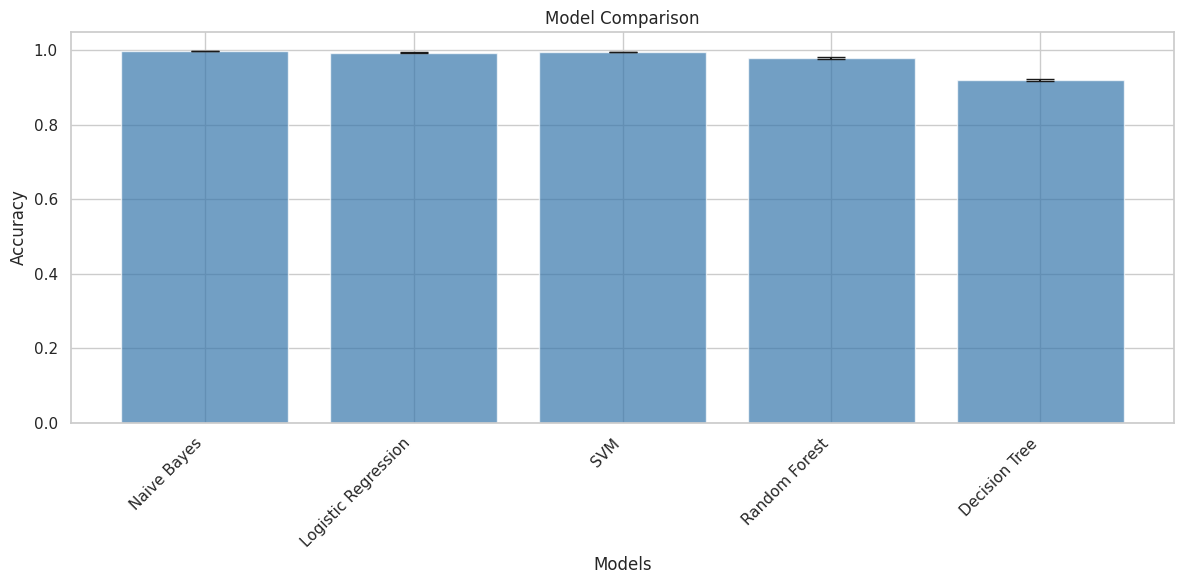

In [122]:
# Compare model performance
models_to_compare = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

compare_models(models_to_compare, X_train, y_train)

* Naive Bayes, Logistic Regression, and SVM exhibit exceptional accuracy, with Naive Bayes being the most computationally efficient.
* Random Forest balances accuracy and efficiency, making it a viable choice.
* Decision Tree, while quick, shows a trade-off with lower accuracy and higher variability.

<a id="six"></a>
### 6.2. Conclusion
<a href=#cont>Back to Table of Contents</a>

In this comparative analysis of different machine learning models for language classification, there are significant in both accuracy and runtime. Naive Bayes demonstrated exceptional accuracy, achieving 99.80% with a minimal standard deviation of 0.07%. It also exhibited the fastest runtime of 0.71 seconds, making it an efficient choice for real-time language prediction. Logistic Regression and Support Vector Machine (SVM) followed closely with accuracies of 99.39% and 99.47%, respectively. While both models delivered high accuracy, the SVM incurred a higher runtime of 723.35 seconds compared to Logistic Regression's 150.67 seconds.

Random Forest, while maintaining a commendable accuracy of 97.87%, showed a longer runtime of 245.13 seconds. Decision Tree, while the fastest among tree-based models, lagged behind with an accuracy of 91.98%.

<a id="six"></a>
### 6.3. Recommendations
<a href=#cont>Back to Table of Contents</a>

Considering the trade-off between accuracy and runtime, Naive Bayes emerges as the top performer for this South African languages classification task. Its exceptional accuracy and minimal runtime make it a strong candidate for deployment in real-world applications where swift predictions are crucial. Logistic Regression also presents a viable alternative, offering a good balance between accuracy and runtime. 

<a id="six"></a>
### 6.4. Kaggle submission
<a href=#cont>Back to Table of Contents</a>

In [103]:
# Predict test data with naive bayes
naive_bayes_model = MultinomialNB(alpha=0.1)
naive_bayes_model.fit(X_train, y_train)
nb_classification = naive_bayes_model.predict(test_lang)

In [104]:
# Extract index feature from test_df
index = test_df['index']
# Store index in DataFrame
index_df = pd.DataFrame(index, columns=['index'])
submission = pd.DataFrame(nb_classification, columns= ['lang_id'])

In [105]:
# Join index_df and submission
nb_submission = index_df.join(submission)
nb_submission.head()


,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


In [106]:
# Store nb_submission to csv
nb_submission.to_csv('nb_submission1.csv', index=False)

* A CSV file with the index and lang_id features for submission to Kaggle was generated from predictions with the Naive Bayes model, whose accuracy was exceptional and who run-time was also the fastest.